
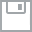
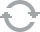
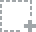
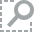
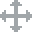
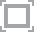
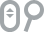
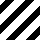
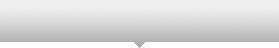
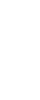
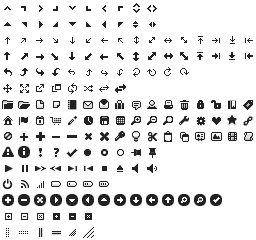
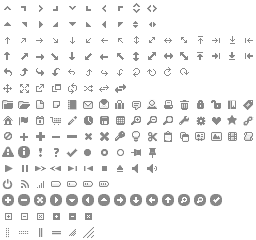
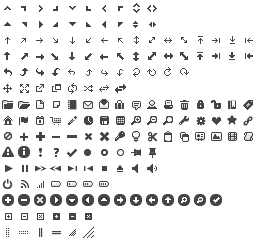
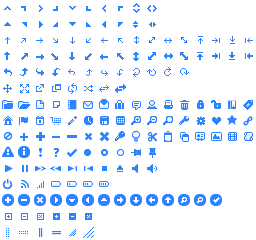
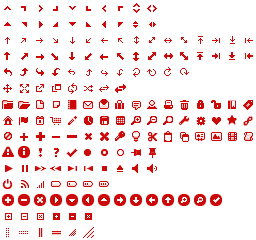
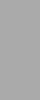
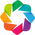
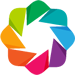

In [256]:
import json
import urllib
import pandas as pd
import numpy as np
import requests
from bokeh.plotting import figure, output_notebook,show
output_notebook()
import matplotlib.pyplot as plt
%matplotlib inline

# The dataset is from a group of 768 women over 21 years old of Pima Indian heritage. The data includes:
 1. Number of times pregnant
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 3. Diastolic blood pressure (mm Hg)
 4. Triceps skin fold thickness (mm)
 5. 2-Hour serum insulin (mu U/ml)
 6. Body mass index (weight in kg/(height in m)^2)
 7. Diabetes pedigree function
 8. Age (years)
 9. Class variable (0 or 1) (class value 1 is interpreted as "tested positive for diabetes")

In [257]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
data_response = requests.get(data_url)
data_response.text

u'6,148,72,35,0,33.6,0.627,50,1\n1,85,66,29,0,26.6,0.351,31,0\n8,183,64,0,0,23.3,0.672,32,1\n1,89,66,23,94,28.1,0.167,21,0\n0,137,40,35,168,43.1,2.288,33,1\n5,116,74,0,0,25.6,0.201,30,0\n3,78,50,32,88,31.0,0.248,26,1\n10,115,0,0,0,35.3,0.134,29,0\n2,197,70,45,543,30.5,0.158,53,1\n8,125,96,0,0,0.0,0.232,54,1\n4,110,92,0,0,37.6,0.191,30,0\n10,168,74,0,0,38.0,0.537,34,1\n10,139,80,0,0,27.1,1.441,57,0\n1,189,60,23,846,30.1,0.398,59,1\n5,166,72,19,175,25.8,0.587,51,1\n7,100,0,0,0,30.0,0.484,32,1\n0,118,84,47,230,45.8,0.551,31,1\n7,107,74,0,0,29.6,0.254,31,1\n1,103,30,38,83,43.3,0.183,33,0\n1,115,70,30,96,34.6,0.529,32,1\n3,126,88,41,235,39.3,0.704,27,0\n8,99,84,0,0,35.4,0.388,50,0\n7,196,90,0,0,39.8,0.451,41,1\n9,119,80,35,0,29.0,0.263,29,1\n11,143,94,33,146,36.6,0.254,51,1\n10,125,70,26,115,31.1,0.205,41,1\n7,147,76,0,0,39.4,0.257,43,1\n1,97,66,15,140,23.2,0.487,22,0\n13,145,82,19,110,22.2,0.245,57,0\n5,117,92,0,0,34.1,0.337,38,0\n5,109,75,26,0,36.0,0.546,60,0\n3,158,76,36,245,31.6,0.851,2

In [258]:
data_response_split = data_response.text.split('\n')

In [259]:
data_response_split

[u'6,148,72,35,0,33.6,0.627,50,1',
 u'1,85,66,29,0,26.6,0.351,31,0',
 u'8,183,64,0,0,23.3,0.672,32,1',
 u'1,89,66,23,94,28.1,0.167,21,0',
 u'0,137,40,35,168,43.1,2.288,33,1',
 u'5,116,74,0,0,25.6,0.201,30,0',
 u'3,78,50,32,88,31.0,0.248,26,1',
 u'10,115,0,0,0,35.3,0.134,29,0',
 u'2,197,70,45,543,30.5,0.158,53,1',
 u'8,125,96,0,0,0.0,0.232,54,1',
 u'4,110,92,0,0,37.6,0.191,30,0',
 u'10,168,74,0,0,38.0,0.537,34,1',
 u'10,139,80,0,0,27.1,1.441,57,0',
 u'1,189,60,23,846,30.1,0.398,59,1',
 u'5,166,72,19,175,25.8,0.587,51,1',
 u'7,100,0,0,0,30.0,0.484,32,1',
 u'0,118,84,47,230,45.8,0.551,31,1',
 u'7,107,74,0,0,29.6,0.254,31,1',
 u'1,103,30,38,83,43.3,0.183,33,0',
 u'1,115,70,30,96,34.6,0.529,32,1',
 u'3,126,88,41,235,39.3,0.704,27,0',
 u'8,99,84,0,0,35.4,0.388,50,0',
 u'7,196,90,0,0,39.8,0.451,41,1',
 u'9,119,80,35,0,29.0,0.263,29,1',
 u'11,143,94,33,146,36.6,0.254,51,1',
 u'10,125,70,26,115,31.1,0.205,41,1',
 u'7,147,76,0,0,39.4,0.257,43,1',
 u'1,97,66,15,140,23.2,0.487,22,0',
 u'13,145,82,

In [260]:
import csv

txt_file = data_response_split
csv_file = "mycsv.csv"

header = "numpreg", "plasmacon", "bloodpress", "skinfold", "seruminsulin", "BMI", "pedigreefunc", "age", "classvar"

in_txt = csv.reader(data_response_split, delimiter = ',')
out_csv = csv.writer(open(csv_file, 'wb'))
out_csv.writerow(header)

for row in in_txt:
    out_csv.writerow(row)

In [261]:
df = pd.read_csv('mycsv.csv')

In [262]:
df.head(50)

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### My hypothesis is that age, BMI, and plasma glucose concentration (or serum insulin levels) with be the biggest predictors of diabetes, in that order.  Also, that age may become less of a factor after 30.

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
numpreg         768 non-null int64
plasmacon       768 non-null int64
bloodpress      768 non-null int64
skinfold        768 non-null int64
seruminsulin    768 non-null int64
BMI             768 non-null float64
pedigreefunc    768 non-null float64
age             768 non-null int64
classvar        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [264]:
df.describe()

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [265]:
df.head(100)

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Based on the data minimums, it looks like there some missing values even though there are non NULL values. Plasma glucose concentration, blood pressure, triceps skin fold, serum insulin, and BMI should never have a value of zero. It looks like most of the zero values occur in the blood pressure, skin fold, and serum insulin columns.

In [266]:
df[df.bloodpress == 0]

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


###  It looks like most of the entries with blood pressure values of zero also have zero values for skin fold and
### serum insulin, so I would take those out.  There's too much information missing, and there doesn't appear to 
### be a correlation with any of the other values, so it would be difficult to impute.

In [267]:
df[df.seruminsulin == 0]

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
15,7,100,0,0,0,30.0,0.484,32,1


In [268]:
df[df.skinfold == 0]

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
15,7,100,0,0,0,30.0,0.484,32,1
17,7,107,74,0,0,29.6,0.254,31,1
21,8,99,84,0,0,35.4,0.388,50,0


#### Skin fold values and serum insulin values are are missing for too large a segment of the dataset to delete for now.  I'll see what information I get without removing them first.

In [269]:
df[df.BMI == 0]

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
9,8,125,96,0,0,0,0.232,54,1
49,7,105,0,0,0,0,0.305,24,0
60,2,84,0,0,0,0,0.304,21,0
81,2,74,0,0,0,0,0.102,22,0
145,0,102,75,23,0,0,0.572,21,0
371,0,118,64,23,89,0,1.731,21,0
426,0,94,0,0,0,0,0.256,25,0
494,3,80,0,0,0,0,0.174,22,0
522,6,114,0,0,0,0,0.189,26,0
684,5,136,82,0,0,0,0.640,69,0


In [270]:
df[df.plasmacon == 0]

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


### I would delete the entries with zero values in plasma glucose concentration because they mostly also have no values for serum insulin levels.  I would also remove the entries with a zero value for BMI, because there are so few and they also overlap with people who are missing values for other features.  However, it is striking that of the eleven people who have a zero value for BMI, only two have diabetes, ans all but three are in their (low to mid) twenties.  

In [271]:
df.sort_values(by ='age').head(100)

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
255,1,113,64,35,0,33.6,0.543,21,1
60,2,84,0,0,0,0.0,0.304,21,0
102,0,125,96,0,0,22.5,0.262,21,0
182,1,0,74,20,23,27.7,0.299,21,0
623,0,94,70,27,115,43.5,0.347,21,0
624,2,108,64,0,0,30.8,0.158,21,0
55,1,73,50,10,0,23.0,0.248,21,0
626,0,125,68,0,0,24.7,0.206,21,0
627,0,132,78,0,0,32.4,0.393,21,0
629,4,94,65,22,0,24.7,0.148,21,0


In [272]:
df.groupby('age').mean()

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,classvar
age,,,,,,,,
21,1.079365,108.317460,65.936508,19.349206,73.634921,27.817460,0.433825,0.079365
22,1.555556,108.208333,63.722222,20.486111,74.486111,29.509722,0.430625,0.152778
23,1.578947,111.578947,64.315789,22.368421,118.026316,31.502632,0.438579,0.184211
24,1.891304,117.891304,64.956522,25.934783,88.021739,32.569565,0.393565,0.173913
25,1.770833,110.083333,59.666667,23.958333,82.895833,31.943750,0.600500,0.291667
26,1.969697,118.212121,64.181818,23.666667,90.878788,34.915152,0.413455,0.242424
27,2.562500,115.281250,73.500000,18.375000,63.125000,31.950000,0.471750,0.250000
28,3.028571,119.914286,68.314286,23.628571,94.600000,33.642857,0.459629,0.285714
29,3.310345,127.379310,68.241379,21.000000,88.793103,33.541379,0.408897,0.448276


In [273]:
df = df[df.BMI != 0]

In [274]:
df = df[df.seruminsulin != 0]

In [275]:
df = df[df.skinfold != 0]

In [276]:
df = df[df.plasmacon != 0]

In [277]:
df = df[df.bloodpress != 0]

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
numpreg         392 non-null int64
plasmacon       392 non-null int64
bloodpress      392 non-null int64
skinfold        392 non-null int64
seruminsulin    392 non-null int64
BMI             392 non-null float64
pedigreefunc    392 non-null float64
age             392 non-null int64
classvar        392 non-null int64
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [279]:
df.describe()

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [280]:
colors = []
for var in df['classvar']:
    if var == 0:
        colors.append('blue')
    elif var == 1:
        colors.append('red')
    else:
        colors.append('yellow')
print colors

['blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'b

In [281]:
df.head()

,numpreg,plasmacon,bloodpress,skinfold,seruminsulin,BMI,pedigreefunc,age,classvar
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


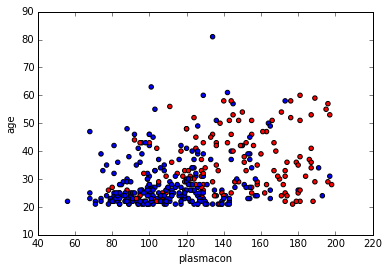

In [282]:
df.plot(kind='scatter', x=1, y=7, c=colors)

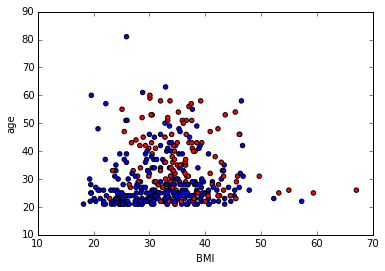

In [283]:
df.plot(kind='scatter', x=5, y=7, c=colors)

In [284]:
feat_x = df.columns[1]
feat_y = df.columns[7]

p1 = figure(plot_width=400, plot_height=400, x_axis_label=feat_x, y_axis_label=feat_y)

p1.circle(df[feat_x], df[feat_y], line_width=1, color=colors, alpha=0.4, size=8)

show(p1)

In [285]:
import bokeh.plotting as bkp

In [286]:
plots = []
for feat_x in df.columns:
    for feat_y in df.columns:
        
        temp_p = figure(plot_width=200,
                        plot_height=200,
                        x_axis_label=feat_x,
                        y_axis_label=feat_y)
        
        
        temp_p.circle(df[feat_x],
                      df[feat_y],
                      line_width=1,
                      color=colors,
                      alpha=0.4)
        
        temp_p.xaxis.axis_label_text_font_size = '9pt'
        temp_p.yaxis.axis_label_text_font_size = '9pt'
        
        plots.append(temp_p)
        
sqrt = len(plots)**0.5
gplots = np.array(plots).reshape(sqrt,sqrt)

a = bkp.gridplot(gplots.tolist())
show(a)

### Actually, it turns out that you can't do an effective K Nearest Neighbor with a bunch of zero values, so I went back and got rid of the entries with zero values in serum and skinfold.

In [287]:
df.ix[:,:-1].values

array([[   1.   ,   89.   ,   66.   , ...,   28.1  ,    0.167,   21.   ],
       [   0.   ,  137.   ,   40.   , ...,   43.1  ,    2.288,   33.   ],
       [   3.   ,   78.   ,   50.   , ...,   31.   ,    0.248,   26.   ],
       ..., 
       [   2.   ,   88.   ,   58.   , ...,   28.4  ,    0.766,   22.   ],
       [  10.   ,  101.   ,   76.   , ...,   32.9  ,    0.171,   63.   ],
       [   5.   ,  121.   ,   72.   , ...,   26.2  ,    0.245,   30.   ]])

In [288]:
X = df.ix[:,:-1].values
y = df.classvar.values

In [304]:
from sklearn.cross_validation import train_test_split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [316]:
from sklearn.neighbors import KNeighborsClassifier

In [317]:
myknn = KNeighborsClassifier(5).fit(X_train, y_train)

In [318]:
myknn.predict(X_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [319]:
correct = 0

predicted = myknn.predict(X_test)

for i in xrange(0, len(predicted)):
    if predicted[i] == y_test[i]:
        correct += 1

print "Number correct:",correct
print "Score:",float(correct)/len(y_test)

Number correct: 59
Score: 0.746835443038


In [320]:
myknn.score(X_test, y_test)

0.74683544303797467

In [321]:
def cross_validate_df(data,label,model,k):
    """Return Average score across k iterations
    Parameters
    -----------
    data : DataFrame with features to use in X
    label : Series with target y
    model : ML Model to use
    k : int number of iterations
    """
    train_slices = []
    test_slices = []
    positions = data.index.values

    # Remember this technique? We're going to 
    # shuffle our data in place using NumPy
    np.random.shuffle(positions)

    for i in range(k):

        # When creating and evaluating a loop, it's important to understand
        # the loop at 3 points: 
        # initial iteration (i = 0)
        # steady state (0 < i < end) assuming it's running smoothly
        # exit (i = end)

        section_start = i*len(data)/k
        section_end = (i+1)*len(data)/k
        test_slices.append(positions[ section_start:section_end ])

        # We now want the rest of the data, slicing up to the start
        # and combining that with a slice from the test slice end to
        # the end of the dataframe

        train_p1 = positions[ :section_start ]
        train_p2 = positions[ section_end: ]
        train_combo = np.concatenate([train_p1,train_p2])
        train_slices.append(train_combo)

    scores = 0

    for train_sl, test_sl in zip(train_slices,test_slices):

        model.fit(data.loc[train_sl],label.loc[train_sl])
        k_score = model.score(data.loc[test_sl],label.loc[test_sl])
        scores += k_score
        print k_score
    return scores/k

In [324]:
model = KNeighborsClassifier(50)

to_predict = "classvar"
features=["numpreg", "plasmacon", "bloodpress", "skinfold", "seruminsulin", "BMI", "pedigreefunc", "age"]
data = df[features]
label = df[to_predict]
folds=5

In [325]:
cross_validate_df(data,label,model,5)

0.730769230769
0.74358974359
0.708860759494
0.782051282051
0.772151898734


0.74748458292762099

In [326]:
from sklearn.cross_validation import cross_val_score

# Results of using the built-in cross validation
# Note: Default is Kfold, but within sklearn.cross_validation
# there are many types of validation that can be used
cross_val_score(model, data, label, cv=3)

array([ 0.75      ,  0.71538462,  0.76923077])

In [328]:
np.mean(cross_val_score(model, data, label, cv=3))

0.74487179487179489

In [329]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics